# Black Friday Dataset EDA and Feature Engineering
## Cleaning and preparing the data for model training

#Dataset has been taken from 
https://www.kaggle.com/datasets/sdolezel/black-friday

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#importing dataset
#as we have two datasets one is train.csv and another is test.csv for training and testing our model

df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_train.shape

(550068, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df_train['Product_Category_3'].isnull().sum()

383247

In [11]:
df_train.isnull().sum() #Product_Category2 and Product_Category3 has more null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
#its always better to do pre-processing on both the datasets i.e. train and test together

#importing test data
df_test=pd.read_csv('test.csv')
df_test.head()  #in test dataset we wont be getting the Target(predicted) variable i.e. Purchase ;which we need to predict based upon or model building

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [13]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
df_test.shape

(233599, 11)

In [15]:
#merge both train and test datasets
#pd.merge(df_train,df_test)

df = pd.concat([df_train,df_test]) #append() method is no more
#this concat() will help in appending the data from test dataset in train dataset
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

## Always remeber ML algos work with numerical features or numerical data only .If you have categorical data (e.g., "Red", "Blue", "Green"), you'll need to convert these categories into numerical data

# Removing unwanted features from dataset which is not required anymore

In [18]:
#removing unwanted features from dataset which is not required anymore
#part of feature engineering
df.drop(['User_ID'],axis=1 ,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [21]:
df['Gender'].isnull().sum()

0

In [22]:
pd.get_dummies(df['Gender'])  #to know what values we have in Gender feature


,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,True,False


## Handling the categorical feature

In [24]:
''' These are the categorical features:

 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object   
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object
 '''

' These are the categorical features:\n\n 1   Product_ID                  550068 non-null  object \n 2   Gender                      550068 non-null  object \n 3   Age                         550068 non-null  object   \n 5   City_Category               550068 non-null  object \n 6   Stay_In_Current_City_Years  550068 non-null  object\n '

In [25]:
#Handle categorical feature Gender
#part of feature engineering

df['Gender']=df['Gender'].map({'F':0,'M':1}) #the map() will replace the key(F,M) given to it with values (0,1) respectively in mentioned feature i.e. Gender

In [26]:
df["Gender"]

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 783667, dtype: int64

In [27]:
#Handle categorical feature Age

df['Age'].unique() # unique() is useful when you want to quickly retrieve all distinct values from a pandas Series or DataFrame column. It helps in exploratory data analysis, data validation, and optimizing your data processing tasks.

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [28]:
pd.get_dummies(df['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
233594,False,False,True,False,False,False,False
233595,False,False,True,False,False,False,False
233596,False,False,True,False,False,False,False
233597,False,False,False,False,True,False,False


In [29]:
#we will use map() method instead of get_dummies()
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

#we can also do label encoding as well


In [30]:

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [31]:
#Handling categorical variable City_Category

pd.get_dummies(df['City_Category'])  #one-hot encoding

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
233594,False,True,False
233595,False,True,False
233596,False,True,False
233597,False,False,True


In [32]:
#df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})
df_city=pd.get_dummies(df['City_Category'],drop_first=True)   #we dropped A because if we have three categories then two are enough 
df_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,False,True


In [33]:
df=pd.concat([df,df_city],axis=1)

In [34]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [35]:
#drop city_category feature
df.drop('City_Category',axis=1,inplace=True) #inplace=true means permanently deleting this value

In [36]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,True,False
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,True,False
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,True,False
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [37]:
df['B']=df['B'].map({False:0,True:1})
df['C']=df['C'].map({False:0,True:1})

# Handling Missing values

In [ ]:
#part of feature engineering

In [39]:
df.isnull().sum() #total how many columns do we have here having nan values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [40]:
#As we have two columns having missing values nan i.e.(Product_Category_2,Product_Category_3) ,so we need to deal with both one by one and follow same step for handling such nan

##### Handling missing values for Product_Category_2

In [42]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [43]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [44]:
#use mode value to replace the nan values in Product_Category_2 as it is discrete .
#Use mode value for categorical and discrete columns in dataframe having nan values

In [45]:
modevalue=df['Product_Category_2'].mode()[0] #calculating mode value of this column and taking index[0]

In [46]:
modevalue

8.0

In [47]:
df['Product_Category_2']=df['Product_Category_2'].fillna(modevalue) #fillna() is used to replace the nan with particular value #part of feature engineering

In [48]:
df['Product_Category_2'].isnull().sum() #handled missing values 

0

In [49]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

##### Same for Product_Category_3 we have to deal with it

In [51]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [52]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [53]:
modevalue=df['Product_Category_3'].mode()[0]     #calculating mode value of this column and taking index[0]
modevalue

16.0

In [54]:
df['Product_Category_3']= df['Product_Category_3'].fillna(modevalue)  #part of feature engineering

In [55]:
df['Product_Category_3'].isnull().sum() #handled missing values

0

In [56]:
df.head(10)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1
5,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [57]:
df['Stay_In_Current_City_Years'].unique() #checking what are the unique values in this column 

array(['2', '4+', '3', '1', '0'], dtype=object)

In [58]:
#here 4+ is there which we can replace with 4 because values above 4 wont come not even 5 ,so converting 4+ to 4.

In [59]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') #this function will replace + with null

In [60]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [61]:
#one more column i.e. Stay_In_Current_City_Years  which having the object type and needs to be converted to int

df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int) #astype() helps in converting datatype

In [62]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int32

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 74.7+ MB


In [64]:
#converting datatype from int64 to int32
df['B']=df['B'].astype(int)  #converted to int32 from int64 for saving the memory space 
df['C']=df['C'].astype(int)

In [65]:
df.info() #having product id as object is fine ,no need to change it

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualization

In [67]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


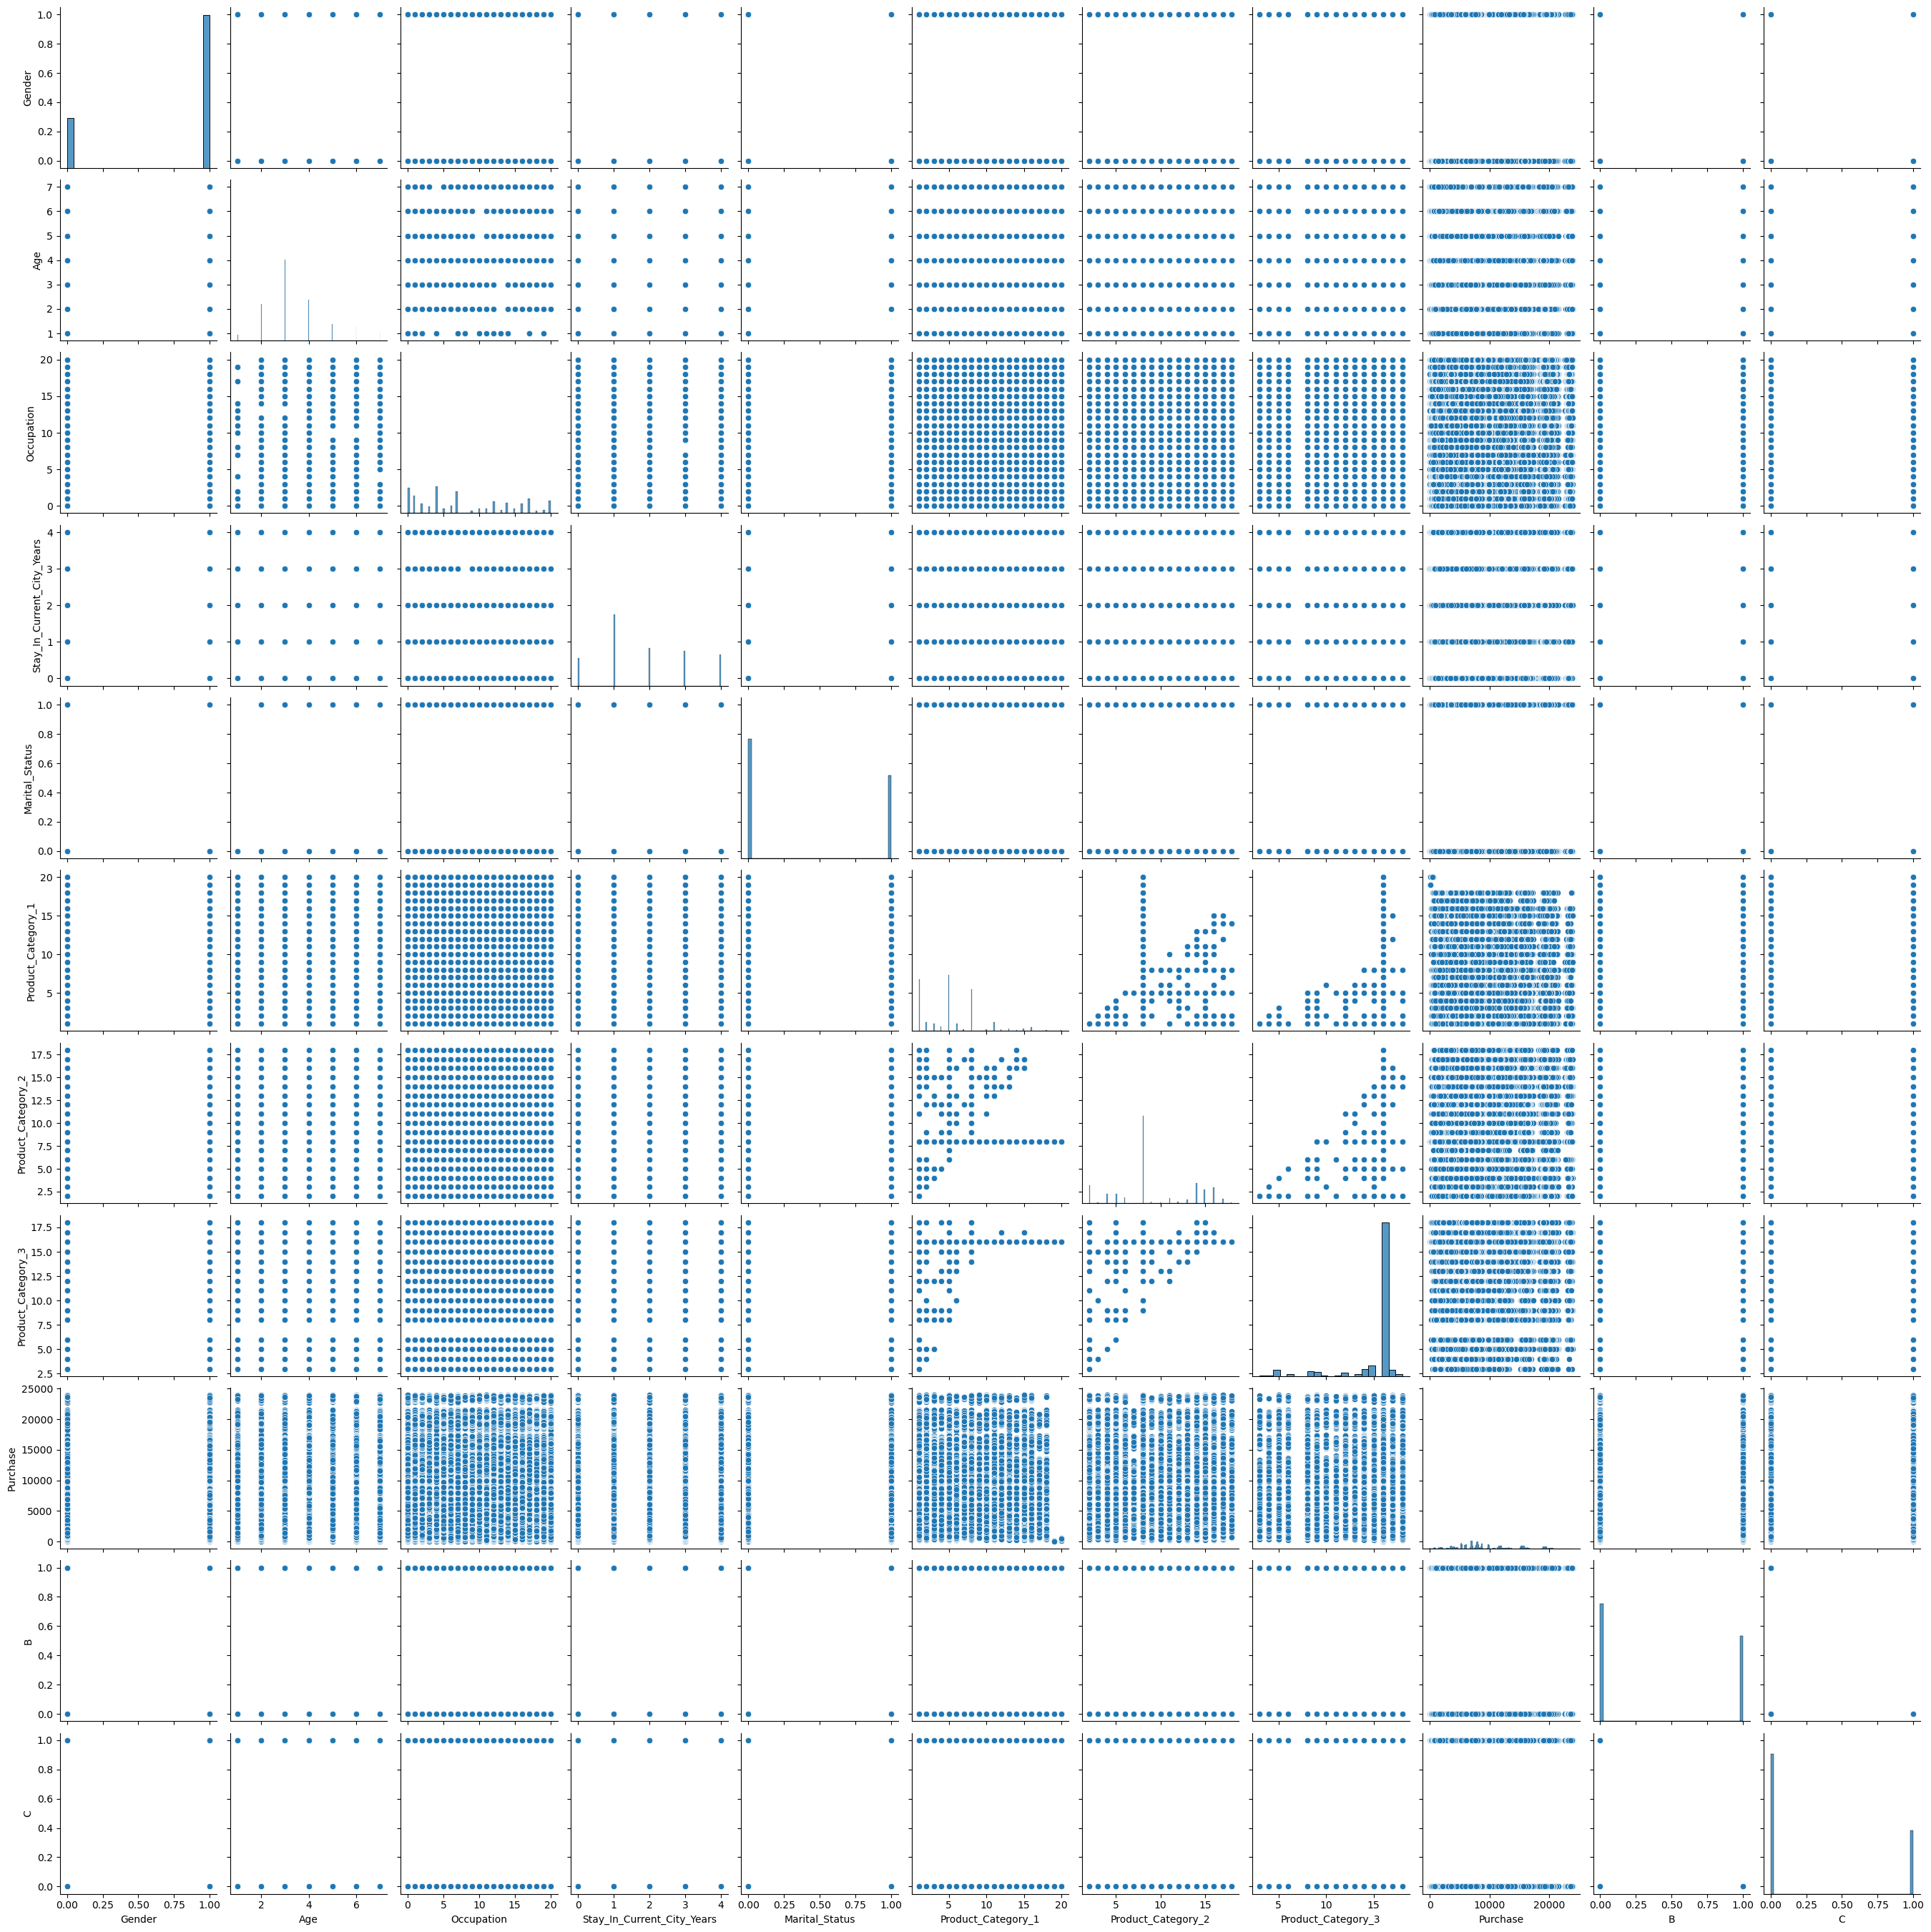

In [68]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

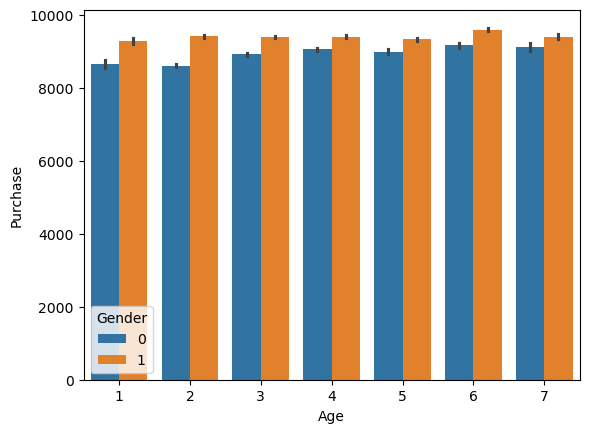

In [69]:
#Visualization of purchase with Age
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

## Observation

1.Male's purchasing is higher then female 

2.All age groups have done approximately equal amount of purchasing

<Axes: xlabel='Occupation', ylabel='Purchase'>

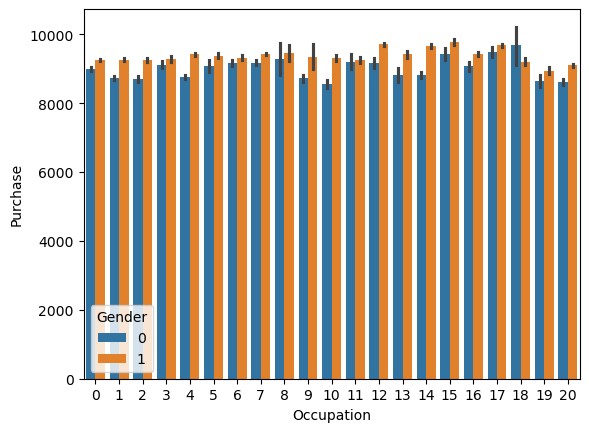

In [71]:
#Visualization of Purchase with Occupation(EDA)
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

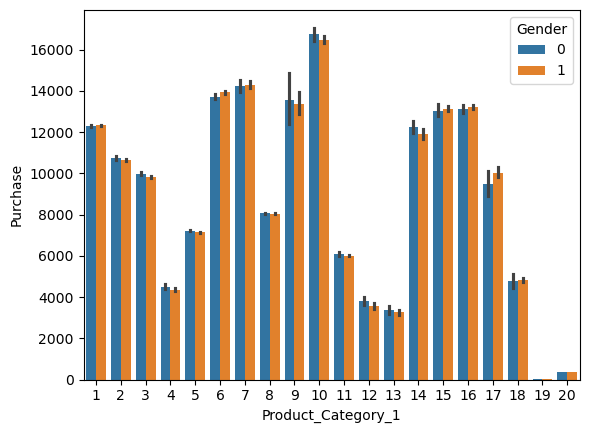

In [72]:
#Visz of Product_Category1 with Purchase(EDA)
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)


## Observation

1.10th number in product category1 has more purchases and female > male in purchase



<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

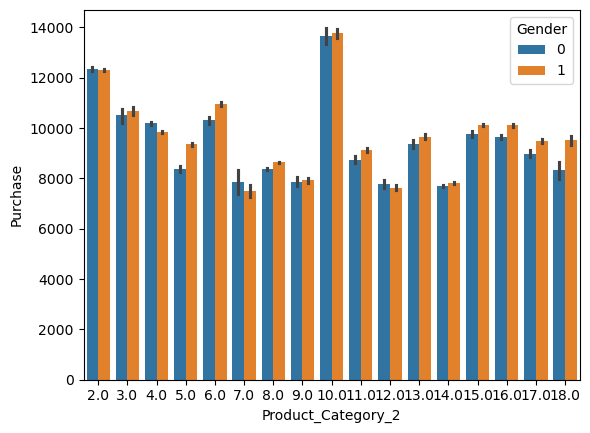

In [74]:
#Visz of Product_Category2 with Purchase (EDA)
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)


## Observation

1.10th number in product_category2 has more purchase

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

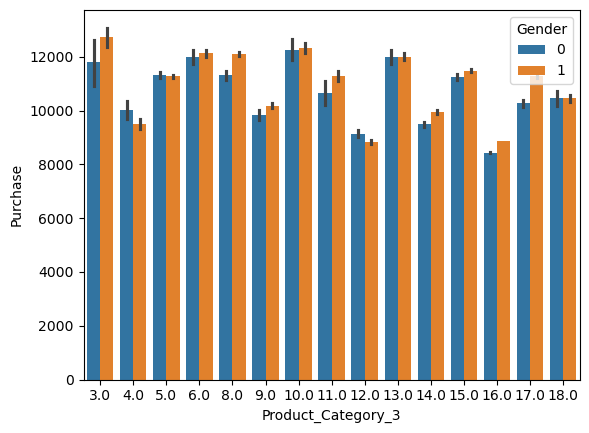

In [76]:
#Visz of Product_Category3 with Purchase
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)


## Observation

1.Overall the total number of purchase is maximum for Product category 1 

In [78]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


## For converting categorical variables into numerical variables

In [ ]:
'''
In machine learning, converting categorical variables into numerical formats is crucial for most algorithms to work effectively. Here are common methods for encoding categorical variables:

One-Hot Encoding:

Description: Converts each category into a new binary column (0 or 1). Each column represents a category.
Example: For a categorical variable "Color" with values ["Red", "Blue", "Green"], the one-hot encoding will create three new columns: "Color_Red", "Color_Blue", and "Color_Green".
Label Encoding:

Description: Converts each category into a unique integer. The categories are assigned integers starting from 0.
Example: For the "Color" variable, "Red" might be encoded as 0, "Blue" as 1, and "Green" as 2.
'''

# Feature Scaling

Feature scaling is the process of adjusting the values of features (input variables) in your dataset so that they are on a similar scale.
This is done to ensure that no feature dominates the others due to its large value range. 
In simpler terms, it makes sure all features have the same "weight" or importance in certain machine learning algorithms.

In [81]:
df_train= df[~df['Purchase'].isnull()]  #as our training dataset dont have nan values in purchase
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [82]:
df_test= df[df['Purchase'].isnull()]
df_test #initially purchase column having nan belonged to test dataset ,so we are taking that only

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [83]:
#training dataset we are taking

X= df_train.drop('Purchase',axis=1,inplace=True) 
#X.drop('Product_ID',axis=1,inplace=True)  #not keeping this feature as it is string
X.shape

(550068, 11)

In [84]:
y= df_train['Purchase'] #taking target variable of complete dataset
y.shape

(550068,)

In [85]:
from sklearn.model_selection import train_test_split   
#The train_test_split function in Scikit-Learn is used to split your dataset into training and testing subsets. This is a common practice in machine learning to evaluate how well a model generalizes to new, unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)   #test_sixe =0.3 means 30% dataset reserved for testing from whole dataset

'''
concept is :
X_train will have 70% training dataset except Purchase (y variable) and return y_train ;model will see the logic behind it
X_test will have 30% test dataset which model will test afterwards and give y_test(predictive values)

y_train(training predicted values)  will have predicted values for X_train as training dataset already has predicted values
y_test(test predicting values) will be predicted by model and give results(predictive values)

'''

'\nconcept is :\nX_train will have 70% training dataset except Purchase (y variable) and return y_train ;model will see the logic behind it\nX_test will have 30% test dataset which model will test afterwards and give y_test(predictive values)\n\ny_train(training predicted values)  will have predicted values for X_train as training dataset already has predicted values\ny_test(test predicting values) will be predicted by model and give results(predictive values)\n\n'

In [206]:
type(X_train)

numpy.ndarray

In [86]:
X_train #as it has Product id in object(string) which we cant take in model

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,P00120042,1,2,14,3,0,1,2.0,16.0,1,0
433826,P00058042,1,6,0,0,1,8,16.0,16.0,0,0
516298,P0095842,1,4,17,0,0,3,4.0,12.0,0,1
193380,P00010842,1,3,4,1,0,8,16.0,16.0,1,0
273542,P00058242,0,4,20,3,1,3,4.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
110268,P00040642,1,5,17,2,0,5,8.0,16.0,0,1
259178,P00022542,1,3,14,2,1,5,8.0,16.0,0,1
365838,P00319042,0,2,1,1,0,5,8.0,16.0,1,0
131932,P00001742,0,2,4,2,0,8,14.0,16.0,1,0


Parameters :--

X: Features or predictors (independent variables).

y: Target variable (dependent variable).

test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20% test data). You can also specify the number of samples.

train_size: Proportion of the dataset to include in the train split (this is usually complementary to test_size). If not specified, it's automatically set to 1 - test_size.

random_state: Seed for the random number generator, ensuring reproducibility. If you set random_state to a fixed number, the split will always be the same each time you run the code.

In [199]:
y_train

396876    19307.0
433826     7859.0
516298    10718.0
193380     9823.0
273542    13702.0
           ...   
110268     1862.0
259178     8623.0
365838     6954.0
131932     6151.0
121958     7146.0
Name: Purchase, Length: 368545, dtype: float64

In [213]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Step 1: Initialize the scaler

X_train = sc.fit_transform(X_train)  # Step 2: Fit the scaler to the training data and transform it
X_test = sc.transform(X_test)  # Step 3: Transform the test data using the already fitted scaler


In [204]:
'''
1.StandardScaler() is a class in Scikit-Learn that standardizes features by removing the mean and scaling to unit variance.(mean=0,and SD=1)

2.fit_transform(X_train):
fit: Calculates the mean and standard deviation for each feature in the training data.
transform: Applies the scaling (standardization) using the calculated mean and standard deviation to the training data.
This ensures that the training data is scaled with respect to its own mean and variance.

3.transform(X_test):
(here fit we didnt use because we dont need to calculate mean and SD for each feature)
Transforms the test data means scaling  using the mean and standard deviation calculated from the training data.
It's crucial to use the same parameters (mean and standard deviation) from the training data to scale the test data. This ensures consistency and avoids data leakage, which could lead to overfitting.

4.This process is a standard practice in machine learning pipelines to improve model performance and ensure fair evaluation on the test set.

'''

"\n1.StandardScaler() is a class in Scikit-Learn that standardizes features by removing the mean and scaling to unit variance.\n\n2.fit_transform(X_train):\nfit: Calculates the mean and standard deviation for each feature in the training data.\ntransform: Applies the scaling (standardization) using the calculated mean and standard deviation to the training data.\nThis ensures that the training data is scaled with respect to its own mean and variance.\n\n3.transform(X_test):\n(here fit we didnt use because we dont need to calculate mean and SD for each feature \nTransforms the test data using the mean and standard deviation calculated from the training data.\nIt's crucial to use the same parameters (mean and standard deviation) from the training data to scale the test data. This ensures consistency and avoids data leakage, which could lead to overfitting.\n\n4.This process is a standard practice in machine learning pipelines to improve model performance and ensure fair evaluation on the

In [ ]:
#now after this we have to train our model

## So pre-processing we have done now and dataset is looking good for training the model now

## About Overfitting 

In [202]:
'''

Overfitting is a common issue in machine learning where a model learns not only the underlying pattern in the training data but also the noise, outliers, or random fluctuations. 
As a result, the model performs exceptionally well on the training data but poorly on new, unseen data, because it has essentially "memorized" the training data rather than generalizing from it.

Key Characteristics of Overfitting:

High Accuracy on Training Data, Low Accuracy on Test Data: The model's performance on the training data is significantly better than on the test data, indicating it has learned details specific to the training set that do not apply to other data.

Model Complexity: Overfitting often occurs when the model is too complex relative to the amount of training data, such as having too many parameters or using a very complex algorithm like deep neural networks without proper regularization.

Noise Sensitivity: The model becomes sensitive to noise or outliers in the training data, treating them as important patterns, which leads to poor generalization.

Visual Representation:
Imagine a scatter plot of data points with a curve fit through them:

Underfitting: A simple straight line might fail to capture the complexity of the data (e.g., a linear model for a non-linear relationship).
Good Fit: A curve that accurately captures the underlying pattern without being too complex.
Overfitting: A highly complex curve that passes through every data point, including outliers, but fails to generalize to new data.
Causes of Overfitting:
Too Complex Models: Using a model that has too many parameters relative to the amount of data (e.g., a deep neural network with limited data).
Insufficient Training Data: When the dataset is small, a model might find spurious patterns that don’t exist in the general population.
Lack of Regularization: Regularization techniques like L1/L2 regularization, dropout (in neural networks), or pruning (in decision trees) help prevent overfitting by penalizing overly complex models.
How to Prevent Overfitting:
Cross-Validation: Use cross-validation techniques like k-fold cross-validation to ensure that the model performs well on different subsets of the data.
Regularization: Apply regularization techniques like L1, L2 regularization, or dropout to penalize overly complex models.
Simplify the Model: Use a simpler model with fewer parameters if the current model is too complex.
More Data: Increase the size of the training data, which helps the model to better capture the underlying patterns without overfitting.
Early Stopping: In iterative models like neural networks, monitor the model's performance on validation data and stop training when the performance starts to degrade.


Example:
Overfitting Scenario: A polynomial regression model that fits a high-degree polynomial (e.g., degree 10) to a small dataset may fit the training data perfectly but perform poorly on new data.
Good Fit Scenario: A lower-degree polynomial (e.g., degree 2) that captures the general trend without being overly complex may perform well on both training and test data.

Summary:
Overfitting is when a model learns the noise or random fluctuations in the training data rather than the actual underlying pattern. This leads to excellent performance on training data but poor performance on new, unseen data. The goal in machine learning is to create models that generalize well, avoiding both overfitting and underfitting.

'''

'\n\nOverfitting is a common issue in machine learning where a model learns not only the underlying pattern in the training data but also the noise, outliers, or random fluctuations. \nAs a result, the model performs exceptionally well on the training data but poorly on new, unseen data, because it has essentially "memorized" the training data rather than generalizing from it.\n\nKey Characteristics of Overfitting:\n\nHigh Accuracy on Training Data, Low Accuracy on Test Data: The model\'s performance on the training data is significantly better than on the test data, indicating it has learned details specific to the training set that do not apply to other data.\n\nModel Complexity: Overfitting often occurs when the model is too complex relative to the amount of training data, such as having too many parameters or using a very complex algorithm like deep neural networks without proper regularization.\n\nNoise Sensitivity: The model becomes sensitive to noise or outliers in the training 

## Also remember

In [ ]:
The get_dummies function in Pandas is used to convert categorical variables into a format that can be provided to machine learning algorithms to perform better. 
Specifically, it converts categorical data (like labels) into a binary (0 or 1) matrix, where each column corresponds to one category.

Why Use get_dummies?

Machine learning models generally work with numerical data. 
If you have categorical data (e.g., "Red", "Blue", "Green"), you'll need to convert these categories into numerical data. 
get_dummies helps you achieve this by creating a new column for each unique category and assigning a 1 or 0 (dummy variable) to indicate the presence of that category in a particular row.

In [ ]:

'''
Exploratory Data Analysis (EDA) and Feature Engineering are both crucial steps in the data science pipeline, but they serve different purposes and involve different activities. Here’s a breakdown of what typically comes under EDA and what comes under Feature Engineering:

Exploratory Data Analysis (EDA)
Purpose:
EDA is focused on understanding the underlying structure of the data, identifying patterns, spotting anomalies, checking assumptions, and uncovering insights that can inform subsequent modeling efforts.

Key Activities:

Data Summarization:

Descriptive Statistics: Calculating summary statistics like mean, median, mode, standard deviation, variance, and quartiles to understand the distribution of each feature.
Frequency Distribution: Checking the distribution of categorical variables.
Data Visualization:

Histograms/Bar Plots: Visualizing the distribution of individual variables.
Box Plots/Violin Plots: Identifying outliers and understanding the spread and skewness of the data.
Scatter Plots: Exploring relationships between two numerical variables.
Pair Plots: Visualizing pairwise relationships between features, often with color coding for different classes.
Heatmaps/Correlation Matrices: Analyzing correlations between numerical features to detect multicollinearity or potential relationships.
Time Series Plots: For visualizing trends, seasonality, and patterns in time series data.
Missing Value Analysis:

Missing Data Visualization: Using heatmaps or bar plots to see the extent and pattern of missing data.
Summary Statistics for Missing Data: Calculating the percentage or count of missing values per feature.
Outlier Detection:

Box Plots: To identify outliers in the data.
Z-Score or IQR Methods: Quantitatively identifying outliers.
Distribution Checks:

Normality Tests: Checking if data follows a normal distribution using Q-Q plots, Shapiro-Wilk test, etc.
Skewness/Kurtosis Analysis: Understanding the shape of the data distribution.
Relationship Analysis:

Correlation Analysis: Checking linear relationships between numerical features.
Chi-Square Test: For assessing the relationship between categorical features.
Data Quality Checks:

Duplicated Data: Identifying and handling duplicate records.
Consistency Checks: Ensuring data consistency across features and records.
Feature Engineering
Purpose:
Feature engineering is about transforming raw data into features that better represent the underlying problem to the predictive models, improving model accuracy and performance.

Key Activities:

Creating New Features:

Feature Interaction: Creating interaction terms between features (e.g., multiplying or adding features together).
Polynomial Features: Generating higher-order features to capture non-linear relationships.
Domain-Specific Features: Creating features based on domain knowledge that may have predictive power.
Transforming Features:

Normalization/Standardization: Scaling features so that they are on the same scale (e.g., Min-Max Scaling, Z-Score Scaling).
Log Transformation: Applying logarithmic transformations to handle skewed distributions.
Binning: Discretizing continuous variables into categorical bins.
Handling Skewness: Applying transformations like log, square root, or Box-Cox to reduce skewness.
Encoding Categorical Variables:

One-Hot Encoding: Converting categorical variables into a series of binary features.
Label Encoding: Converting categorical labels into numeric labels.
Target Encoding: Using the target variable to encode categorical features.
Imputing Missing Values:

Statistical Imputation: Filling missing values using mean, median, mode, or more sophisticated methods like KNN or model-based imputation.
Creating Indicator Features: Adding a binary feature that indicates whether a value was missing.
Feature Selection:

Removing Redundant Features: Dropping features with low variance or high correlation with other features.
Using Feature Importance: Using models to rank and select the most important features.
Dimensionality Reduction: Techniques like PCA or LDA to reduce the number of features.
Handling Imbalanced Data:

SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic data points for underrepresented classes.
Under-sampling: Reducing the number of samples in the majority class.
Summary of Differences:
EDA is primarily about understanding and analyzing the data to gain insights. It's more about visualization, summarization, and identifying patterns or anomalies.

Feature Engineering is about transforming the data into a format that is more suitable for modeling, which involves creating, modifying, and selecting features to improve the model’s performance.

While EDA helps you understand what your data looks like and what might be important, Feature Engineering uses that understanding to create features that allow your models to perform better.

'''